<h1 style="font-weight:bold;">Aprendiendo Pandas (de una forma [creo] más ordenada)</h1>

6-dic-20: estoy siguiendo [esta guía](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)

In [2]:
import pandas as pd

# "Minimal Sufficent Pandas"

- It is a small subset of the library that is sufficient to accomplish nearly everything that it has to offer.
- It allows you to focus on doing data analysis and not the syntax
***

Temas a ver:

- Crear un DataFrame desde cero
- Seleccionar una columna
- Indexadores `loc` e `iloc`
- Quedarse con un subset del DataFrame usando slicing
- `read_csv` vs `read_table` duplication
- `isna` vs `isnull` and `notna` vs `notnull`
- Arithmetic and Comparison Operators and their Corresponding Methods
- Elegir una columna como el índice del DataFrame
- Builtin Python functions vs Pandas methods with the same name
- Standardizing `groupby` aggregation
- Handling a MultiIndex
- `pivot` vs `pivot_table`
- The similarity between `melt` and `stack`
- The similarity between `pivot` and `unstack`

***
***

## Creando un DataFrame de cero

En los siguientes ejercicios vamos a usar un DF, aprovecho para mostrar una de tantas formas de crearlo "de cero" (lo saqué de distintas páginas que encontré en Google)

In [18]:
columnas = ['state', 'color', 'favorite food', 'age', 'height', 'score', 'count']
indice = ['Jane', 'Niko', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia']
data = {'state': ['NY', 'TX', 'FL', 'AL', 'AK', 'TX', 'TX'],
        'color': ['blue', 'green', 'red', 'white', 'gray', 'black', 'red'],
        'favorite food': ['Steak', 'Lamb', 'Mango', 'Apple', 'Cheese', 'Melon', 'Beans'],
        'age': [30, 2, 12, 4, 32, 33, 69],
        'height': [165, 70, 120, 80, 180, 172, 150],
        'score': [4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2],
        'count': [10, 4, 3, 12, 8, 99, 44]}
df = pd.DataFrame(data = data, columns = columnas, index = indice)
df.index.name = 'name'
df

,state,color,favorite food,age,height,score,count
name,,,,,,,
Jane,NY,blue,Steak,30,165,4.6,10
Niko,TX,green,Lamb,2,70,8.3,4
Aaron,FL,red,Mango,12,120,9.0,3
Penelope,AL,white,Apple,4,80,3.3,12
Dean,AK,gray,Cheese,32,180,1.8,8
Christina,TX,black,Melon,33,172,9.5,99
Cornelia,TX,red,Beans,69,150,2.2,44


También se puede crear a partir de una lista de diccionarios

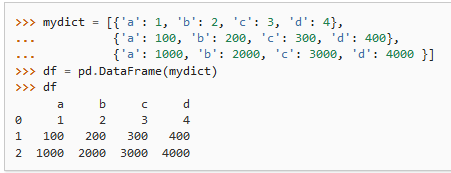

## Seleccionando una única columna

Pandas ofrece varios métodos para hacer esta simple tarea, vamos a ver un par de formas de hacerlo

In [9]:
df['state']

name
Jane         NY
Niko         TX
Aaron        FL
Penelope     AL
Dean         AK
Christina    TX
Cornelia     TX
Name: state, dtype: object

In [10]:
df.state

name
Jane         NY
Niko         TX
Aaron        FL
Penelope     AL
Dean         AK
Christina    TX
Cornelia     TX
Name: state, dtype: object

Con la notación de punto no podés llamar a columnas que tengan *espacios* ni a columnas cuyos nombres sean el de algún método de pandas (como *count*).

Ergo, **usar el formato con corchetes!**

## Indexadores: `loc` e `iloc`

Para buscar filas en lugar de columnas, usar estos dos métodos.

- `.loc['algo']` devuelve toda la fila que tiene esa etiqueta

In [13]:
df.loc['Aaron']

state               FL
color              red
favorite food    Mango
age                 12
height             120
score                9
count                3
Name: Aaron, dtype: object

- `.iloc['algo']` devuelve toda la fila correspondiente a ese número de índice en el DataFrame

In [15]:
df.iloc[2]

state               FL
color              red
favorite food    Mango
age                 12
height             120
score                9
count                3
Name: Aaron, dtype: object

## Quedarse con un subset del DataFrame usando slicing

Forma interesante de usar el `loc`. Esto lo recorté de más abajo y lo pegué acá porque me parecía que tenía más sentido

In [53]:
college = pd.read_csv('most-recent-cohorts-all-data-elements.csv', low_memory=False)

El DataFrame este tiene esas columnas consecutivas, así que se puede seleccionar con cuáles quedarse

In [53]:
college_race = college.loc[:, 'UGDS_WHITE':'UGDS_UNKN']
college_race.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,0.0186,0.9120,0.0088,0.0018,0.0022,0.0016,0.0118,0.0070,0.0361
1,0.5717,0.2553,0.0334,0.0633,0.0034,0.0002,0.0457,0.0213,0.0058
2,0.2393,0.7151,0.0171,0.0057,0.0057,0.0000,0.0000,0.0000,0.0171
3,0.7167,0.0969,0.0528,0.0381,0.0095,0.0008,0.0296,0.0223,0.0333
4,0.0167,0.9352,0.0095,0.0041,0.0013,0.0005,0.0102,0.0102,0.0123


## `read_csv` o `read_table`

Corta: `read_table` no se usa, ir por `read_csv`

In [32]:
college.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,PLUS_DEBT_ALL_STAFFANY_N,PLUS_DEBT_ALL_STAFFANY_MD,PLUS_DEBT_INST_NOSTAFFANY_N,PLUS_DEBT_INST_NOSTAFFANY_MD,PLUS_DEBT_ALL_NOSTAFFANY_N,PLUS_DEBT_ALL_NOSTAFFANY_MD,COUNT_NWNE_3YR,COUNT_WNE_3YR,CNTOVER150_3YR,SEARCH_STRING
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,1527,14000,41,12688,46,11067,19.0,460.0,411.0,Alabama A & M University AAMU
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,2153,15200,11,PrivacySuppressed,22,18300,116.0,2061.0,1834.0,University of Alabama at Birmingham
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,5.0,21.0,15.0,Amridge University Southern Christian Universi...
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,640,PrivacySuppressed,13,PrivacySuppressed,15,PrivacySuppressed,56.0,1068.0,990.0,University of Alabama in Huntsville UAH Unive...
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1456,15403,27,13000,30,12466,28.0,559.0,460.0,Alabama State University


## `isna` vs `isnull` and `notna` vs `notnull`

Básicamente `isna` es lo mismo que `isnull` y `notna` es lo mismo que `notnull` (estos últimos son la negación de los primeros

In [33]:
col_isna = college.isna()
col_isna.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,PLUS_DEBT_ALL_STAFFANY_N,PLUS_DEBT_ALL_STAFFANY_MD,PLUS_DEBT_INST_NOSTAFFANY_N,PLUS_DEBT_INST_NOSTAFFANY_MD,PLUS_DEBT_ALL_NOSTAFFANY_N,PLUS_DEBT_ALL_NOSTAFFANY_MD,COUNT_NWNE_3YR,COUNT_WNE_3YR,CNTOVER150_3YR,SEARCH_STRING
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Vemos que devuelve una matriz del mismo tamaño con Booleanos

## Arithmetic and Comparison Operators and their Corresponding Methods

Todos los operadores aritméticos tienen sus métodos en pandas

- `+` - `add`
- `-` - `sub` and `subtract`
- `*` - `mul` and `multiply`
- `/` - `div`, `divide` and `truediv`
- `**` - `pow`
- `//` - `floordiv`
- `%` - `mod`

Los comparadores también!

- `>`  - `gt`
- `<`  - `lt`
- `>=` - `ge`
- `<=` - `le`
- `==` - `eq
- `!=` - `ne`

Con esto, podemos modificar los valores del DataFrame, veamos un pequeño ejemplo

In [37]:
college['UGDS']

0        4990.0
1       13186.0
2         351.0
3        7458.0
4        3903.0
         ...   
6801        NaN
6802        NaN
6803        NaN
6804        NaN
6805        NaN
Name: UGDS, Length: 6806, dtype: float64

In [40]:
col_aux = college
col_aux['UGDS'] = col_aux['UGDS'].add(100)
col_aux['UGDS']

0        5090.0
1       13286.0
2         451.0
3        7558.0
4        4003.0
         ...   
6801        NaN
6802        NaN
6803        NaN
6804        NaN
6805        NaN
Name: UGDS, Length: 6806, dtype: float64

Vamos a calcular el Z-Score de cada escuela

## Elegir una columna como el índice del DataFrame

In [45]:
college_idx = college.set_index('INSTNM')
college_idx.head(2)

,UNITID,OPEID,OPEID6,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,...,PLUS_DEBT_ALL_STAFFANY_N,PLUS_DEBT_ALL_STAFFANY_MD,PLUS_DEBT_INST_NOSTAFFANY_N,PLUS_DEBT_INST_NOSTAFFANY_MD,PLUS_DEBT_ALL_NOSTAFFANY_N,PLUS_DEBT_ALL_NOSTAFFANY_MD,COUNT_NWNE_3YR,COUNT_WNE_3YR,CNTOVER150_3YR,SEARCH_STRING
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,100654,100200,1002,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,3.0,...,1527,14000,41,12688,46,11067,19.0,460.0,411.0,Alabama A & M University AAMU
University of Alabama at Birmingham,100663,105200,1052,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,3.0,...,2153,15200,11,PrivacySuppressed,22,18300,116.0,2061.0,1834.0,University of Alabama at Birmingham


 Ahora que seteamos el índice, vamos a quedarnos con un subset de las columnas 'satmtmid' y 'satvrmid' y vamos a dropear los na

In [46]:
sats = college_idx[['SATMTMID', 'SATVRMID']].dropna()
sats.head()

,SATMTMID,SATVRMID
INSTNM,,
Alabama A & M University,465.0,475.0
University of Alabama at Birmingham,555.0,555.0
University of Alabama in Huntsville,565.0,630.0
Alabama State University,465.0,480.0
The University of Alabama,580.0,590.0


Y ahora queremos el Z-Score de cada colegio. Para eso, le restamos a cada valor la media de la columna a la cual pertenece y lo dividimos por el SD.

In [48]:
zscores_1 = sats.sub(sats.mean()).div(sats.std())
zscores_1.head()

,SATMTMID,SATVRMID
INSTNM,,
Alabama A & M University,-1.356073,-1.453025
University of Alabama at Birmingham,-0.072517,-0.161586
University of Alabama in Huntsville,0.070100,1.049138
Alabama State University,-1.356073,-1.372310
The University of Alabama,0.284026,0.403418


In [49]:
media = sats.mean()
sd = sats.std()
zscore_2 = (sats - media) / sd
zscore_2.head()

,SATMTMID,SATVRMID
INSTNM,,
Alabama A & M University,-1.356073,-1.453025
University of Alabama at Birmingham,-0.072517,-0.161586
University of Alabama in Huntsville,0.070100,1.049138
Alabama State University,-1.356073,-1.372310
The University of Alabama,0.284026,0.403418


Obvio que la primera forma es mucho más linda!

## Standardizing `groupby` aggregation

Según la documentación de *pandas*, el método `groupby` hace:

> A groupby operation involves some combination of splitting the object, applying a function, and combining the > results. This can be used to group large amounts of data and compute operations on these groups.

Vamos a ver una manera estándar de usarlo con el DataFrame que tenemos cargado

La sintaxis básica es:
```python
df.groupby('grouping column').agg({'aggregating column': 'aggregating function'})
```

La idea es, a partir de las columnas SATMTMID y SATVRMID (resultados de los exámenes SAT) encontrar el máximo por ESTADO.

Vamos a usar un subset

In [54]:
subset = college[['STABBR', 'SATMTMID', 'SATVRMID', 'UGDS']]
subset.head()

,STABBR,SATMTMID,SATVRMID,UGDS
0,AL,465.0,475.0,4990.0
1,AL,555.0,555.0,13186.0
2,AL,NaN,NaN,351.0
3,AL,565.0,630.0,7458.0
4,AL,465.0,480.0,3903.0


In [55]:
resultado_satmtmid = college.groupby('STABBR').agg({'SATMTMID': 'max'})
resultado_satmtmid.head()

,SATMTMID
STABBR,
AK,575.0
AL,615.0
AR,625.0
AS,NaN
AZ,625.0


Se pueden hacer varias agrupaciones al mismo tiempo!

In [56]:
mas_complicado = college.groupby('STABBR').agg({'SATMTMID': ['min', 'max'],
                                                'SATVRMID': ['min', 'max'],
                                                'UGDS': 'mean'}).round(0)
mas_complicado.head(10)

SATMTMID        SATVRMID           UGDS
            min    max      min    max    mean
STABBR                                        
AK        575.0  575.0    585.0  585.0  2019.0
AL        460.0  615.0    425.0  630.0  3002.0
AR        460.0  625.0    490.0  650.0  1455.0
AS          NaN    NaN      NaN    NaN   991.0
AZ        485.0  625.0    505.0  620.0  4190.0
CA        450.0  795.0    300.0  760.0  3835.0
CO        480.0  700.0    495.0  670.0  2780.0
CT        455.0  770.0    475.0  745.0  2283.0
DC        466.0  735.0    469.0  715.0  3376.0
DE        445.0  625.0    467.0  630.0  2611.0

## Handling a MultiIndex

In [79]:
df_aux = college.groupby(['STABBR', 'RELAFFIL']).agg({'SATMTMID': ['min', 'max'],
                                                      'SATVRMID': ['min', 'max'],
                                                      'UGDS': 'mean'})
df_aux.head(10).round(0)

SATMTMID        SATVRMID           UGDS
                     min    max      min    max    mean
STABBR RELAFFIL                                        
AK     37.0          NaN    NaN      NaN    NaN    78.0
       71.0          NaN    NaN      NaN    NaN   283.0
       88.0          NaN    NaN      NaN    NaN    37.0
AL     30.0        550.0  550.0    550.0  550.0  1252.0
       42.0          NaN    NaN      NaN    NaN   105.0
       54.0        530.0  570.0    568.0  601.0  1362.0
       55.0          NaN    NaN      NaN    NaN  1546.0
       66.0          NaN    NaN      NaN    NaN   689.0
       71.0        534.0  560.0    540.0  570.0  1172.0
       74.0        575.0  575.0    530.0  530.0   826.0

Tanto las filas como las columnas tienen varios niveles de indización, lo cual es un garrón.

Se puede convertir ese mostro en algo más manejable de un solo nivel

In [80]:
df_aux.columns = ['min satmtmid', 'max satmtmid', 'min satvrmid', 'max satvrmid', 'mean ugds']
df_aux.head(10)

min satmtmid  max satmtmid  min satvrmid  max satvrmid  \
STABBR RELAFFIL                                                           
AK     37.0               NaN           NaN           NaN           NaN   
       71.0               NaN           NaN           NaN           NaN   
       88.0               NaN           NaN           NaN           NaN   
AL     30.0             550.0         550.0         550.0         550.0   
       42.0               NaN           NaN           NaN           NaN   
       54.0             530.0         570.0         568.0         601.0   
       55.0               NaN           NaN           NaN           NaN   
       66.0               NaN           NaN           NaN           NaN   
       71.0             534.0         560.0         540.0         570.0   
       74.0             575.0         575.0         530.0         530.0   

                   mean ugds  
STABBR RELAFFIL               
AK     37.0        78.000000  
       71.0       283.000000  
       88.0        37.000000  
AL     30.0      1252.000000  
       42.0       105.000000  
       54.0      1362.333333  
       55.0      1546.000000  
       66.0       689.000000  
       71.0      1171.500000  
       74.0       826.333333

Reseteamos el índice y vamos a ver que los índices múltiples en las filas se separan en filas distintas

In [81]:
df_aux = df_aux.reset_index().head()
df_aux.head(10)

,STABBR,RELAFFIL,min satmtmid,max satmtmid,min satvrmid,max satvrmid,mean ugds
0,AK,37.0,NaN,NaN,NaN,NaN,78.0
1,AK,71.0,NaN,NaN,NaN,NaN,283.0
2,AK,88.0,NaN,NaN,NaN,NaN,37.0
3,AL,30.0,550.0,550.0,550.0,550.0,1252.0
4,AL,42.0,NaN,NaN,NaN,NaN,105.0


In [82]:
df_aux.set_index('STABBR').head(10)

,RELAFFIL,min satmtmid,max satmtmid,min satvrmid,max satvrmid,mean ugds
STABBR,,,,,,
AK,37.0,NaN,NaN,NaN,NaN,78.0
AK,71.0,NaN,NaN,NaN,NaN,283.0
AK,88.0,NaN,NaN,NaN,NaN,37.0
AL,30.0,550.0,550.0,550.0,550.0,1252.0
AL,42.0,NaN,NaN,NaN,NaN,105.0


**MORALEJA**: después de usar `groupby` conviene *flattenear* el DataFrame obtenido para que sea fácil de manejar!

## The similarity between groupby, pivot_table, and crosstab

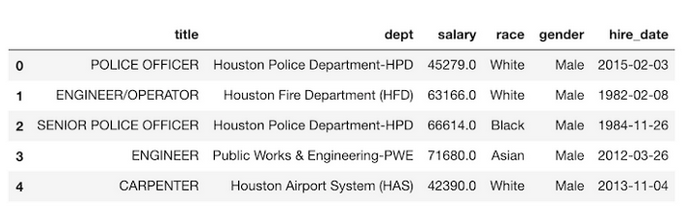

Podemos usar `groupby` para averiguar el salario promedio para cada departamento por género

```python
emp.groupby(['dept', 'gender'].agg({'salary':'mean'})
```

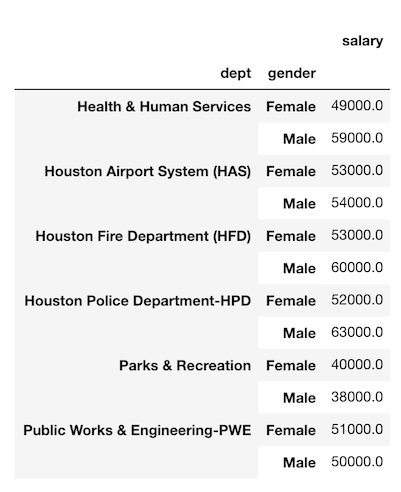

Se puede hacer lo mismo con `pivot_table`

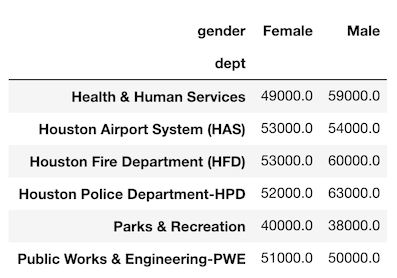

**IDEA**: Usar `pivot_table` para comparar 2 grupos. Usar `groupby` para continuar el análisis

`crosstab` rinde para **FRECUENCIAS RELATIVAS**

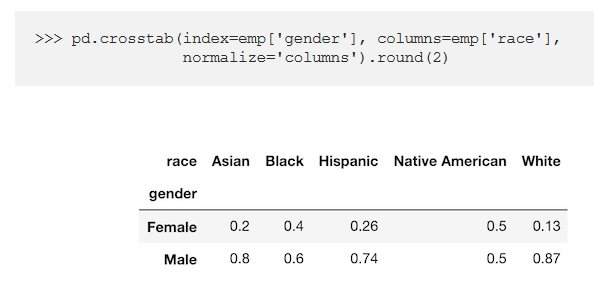

## `Pivot table`

In [112]:
df.pivot_table(index = 'state', columns = 'color', values = 'score', aggfunc = 'mean')

color,black,blue,gray,green,red,white
state,,,,,,
AK,NaN,NaN,1.8,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,3.3
FL,NaN,NaN,NaN,NaN,9.0,NaN
NY,NaN,4.6,NaN,NaN,NaN,NaN
TX,9.5,NaN,NaN,8.3,2.2,NaN


La verdad que no entendí bien, pero se pueden hacer cosas interesantes (maybe)

## MELT O STACK

Ambas reshapean la data para visualizar cosas en concreto (en lugar de ver TODA la tabla). La diferencia radica en que STACK trabaja con los índices y MELT no.

In [114]:
columnas = ['airline', 'ATL', 'DEN', 'DFW']
data = {'airline': ['AA', 'AS', 'B6', 'DL'],
        'ATL': [4, 6, 2, 0],
        'DEN': [9, -3, 12, -3],
        'DFW': [5, -5, 4, 10]}
ad = pd.DataFrame(data =  data, columns = columnas)
ad.head()

,airline,ATL,DEN,DFW
0,AA,4,9,5
1,AS,6,-3,-5
2,B6,2,12,4
3,DL,0,-3,10


In [115]:
ad.melt(id_vars = 'airline', value_vars = ['ATL', 'DEN', 'DFW'])

,airline,variable,value
0,AA,ATL,4
1,AS,ATL,6
2,B6,ATL,2
3,DL,ATL,0
4,AA,DEN,9
5,AS,DEN,-3
6,B6,DEN,12
7,DL,DEN,-3
8,AA,DFW,5
9,AS,DFW,-5


Podemos también cambiar los nombres de las columnas

In [116]:
ad.melt(id_vars='airline', var_name='airport', value_name='arrival delay')

,airline,airport,arrival delay
0,AA,ATL,4
1,AS,ATL,6
2,B6,ATL,2
3,DL,ATL,0
4,AA,DEN,9
5,AS,DEN,-3
6,B6,DEN,12
7,DL,DEN,-3
8,AA,DFW,5
9,AS,DFW,-5
